In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode= 'rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
X_test.shape

(12630, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

36

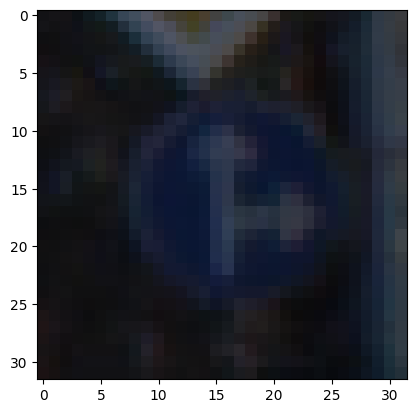

In [9]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

31

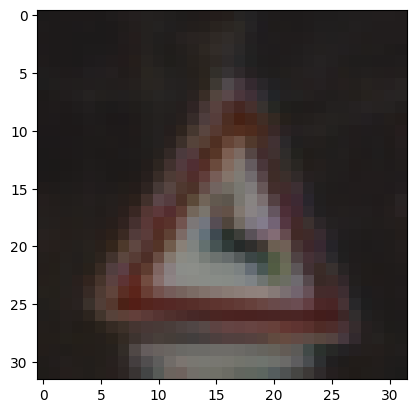

In [16]:
i = 100
plt.imshow(X_validation[i])
y_validation[i]

In [17]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [18]:
X_train_grey = np.sum(X_train/3, axis=3, keepdims=True)
X_test_grey = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_grey = np.sum(X_validation/3, axis = 3, keepdims = True)

In [19]:
X_train_grey_norm = (X_train_grey - 128)/128
X_test_grey_norm = (X_test_grey - 128)/128
X_validation_grey_norm = (X_validation_grey -128)/128

In [23]:
X_train_grey_norm

array([[[[-0.66666667],
         [-0.67708333],
         [-0.68229167],
         ...,
         [-0.7265625 ],
         [-0.73177083],
         [-0.73177083]],

        [[-0.4375    ],
         [-0.43489583],
         [-0.4453125 ],
         ...,
         [-0.51302083],
         [-0.51302083],
         [-0.51041667]],

        [[-0.52864583],
         [-0.52864583],
         [-0.53645833],
         ...,
         [-0.484375  ],
         [-0.4765625 ],
         [-0.47395833]],

        ...,

        [[-0.375     ],
         [-0.375     ],
         [-0.36979167],
         ...,
         [-0.4140625 ],
         [-0.4140625 ],
         [-0.40885417]],

        [[-0.38020833],
         [-0.3828125 ],
         [-0.37760417],
         ...,
         [-0.40104167],
         [-0.40885417],
         [-0.41145833]],

        [[-0.36979167],
         [-0.3671875 ],
         [-0.375     ],
         ...,
         [-0.41927083],
         [-0.41927083],
         [-0.40364583]]],


       [[[-0.8828125 ],


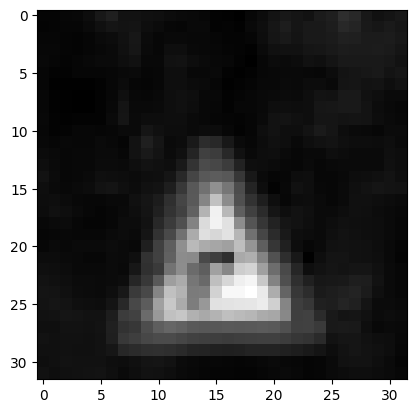

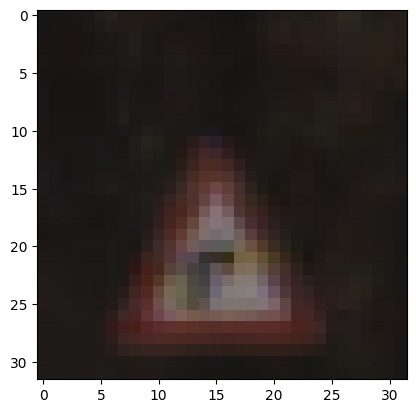

In [33]:
i = 610
plt.imshow(X_train_grey[i].squeeze(), cmap='grey')
plt.figure()
plt.imshow(X_train[i])

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers.legacy import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [25]:
image_shape = X_train_grey[i].shape

In [27]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation='relu', input_shape = (32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='softmax'))



In [28]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [29]:
history = cnn_model.fit(X_train_grey_norm,
                        y_train,
                        batch_size= 500,
                        epochs= 50,
                        verbose=1,
                        validation_data= (X_validation_grey_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 5s 68ms/step - loss: 3.1569 - accuracy: 0.1829 - val_loss: 2.7071 - val_accuracy: 0.2884
Epoch 2/50
70/70 [==============================] - 4s 63ms/step - loss: 1.6193 - accuracy: 0.5465 - val_loss: 1.4776 - val_accuracy: 0.5812
Epoch 3/50
70/70 [==============================] - 4s 63ms/step - loss: 0.9211 - accuracy: 0.7370 - val_loss: 1.1367 - val_accuracy: 0.6610
Epoch 4/50
70/70 [==============================] - 4s 63ms/step - loss: 0.6781 - accuracy: 0.8061 - val_loss: 0.9019 - val_accuracy: 0.7376
Epoch 5/50
70/70 [==============================] - 4s 64ms/step - loss: 0.5370 - accuracy: 0.8522 - val_loss: 0.8436 - val_accuracy: 0.7615
Epoch 6/50
70/70 [==============================] - 5s 66ms/step - loss: 0.4431 - accuracy: 0.8815 - val_loss: 0.8444 - val_accuracy: 0.7644
Epoch 7/50
70/70 [==============================] - 5s 66ms/step - loss: 0.3927 - accuracy: 0.8943 - val_loss: 0.7504 - val_accuracy: 0.7943
Epoch 8/50
70